In [47]:
# importing required libraries
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
import os
import graphviz

In [48]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()


#Importing Data SET

In [49]:
Iris=pd.read_csv('iris.csv')

In [50]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
Iris.shape

(150, 5)

In [52]:
# visualized the Data for better understanding

<BarContainer object of 150 artists>

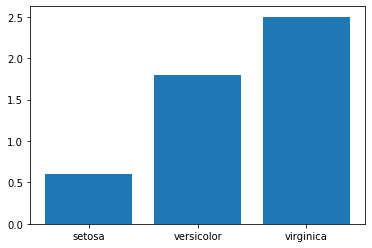

In [53]:
plt.bar(Iris['species'],Iris['petal_width'])

In [54]:
px.scatter(Iris,x='species',y='petal_width',size='petal_width')

In [55]:
px.bar(Iris,x='species',y='petal_width')

In [56]:
Iris.iplot(kind='bar',x=['species'],y=['petal_width'])

In [57]:
px.line(Iris,x='species',y='petal_width')

In [58]:
px.scatter_matrix(Iris,color='species',title='Iris',dimensions=['sepal_length','sepal_width','petal_width','petal_length'])

#Data Preprocessing

In [59]:
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [60]:
#here we drop species to store rest columns in X 
X=Iris.drop(['species'],axis=1)

In [61]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
Y = Iris['species']

In [63]:
Y


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [65]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [67]:
X=np.array(X)

In [68]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#applying train and test 

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [70]:
X_test

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

In [71]:
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# applying Decision Tree

In [72]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [73]:
Y_train.size

105

In [74]:
prediction_DT=DT.predict(X_test)
accuracy_DT=accuracy_score(Y_test,prediction_DT)*100

In [75]:
accuracy_DT

97.77777777777777

In [76]:
Y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [77]:
prediction_DT

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [83]:
os.environ['PATH']+= os.pathsep+(r'C:\Users\ADMIN\AI ML\graphviz\bin')

viz_data=tree.export_graphviz(DT,out_file=None, feature_names=Iris.drop(['species'],axis=1).keys(),class_names=Iris['species'].unique(),filled=True,rounded=True,special_characters=True)

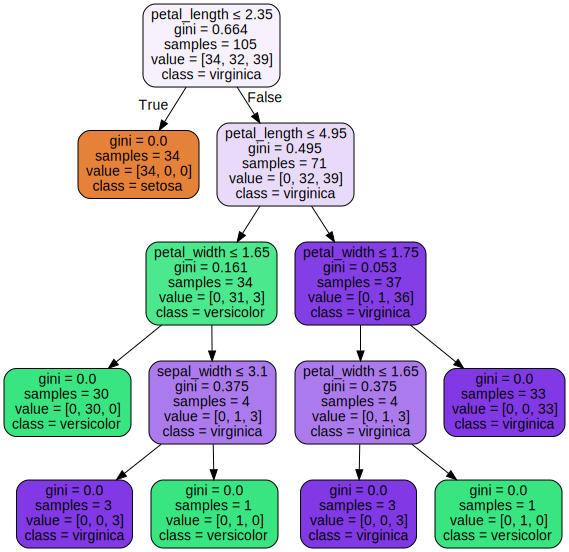

In [86]:
graphviz.Source(viz_data)

In [91]:
Catagory=['Iris-setosa','Iris-versicolor','Iris-verginica']

#lets inpute the value and predict

In [104]:
X_DT=np.array([[1,1,1,1]])
X_DT_prediction=DT.predict(X_DT)

In [105]:
X_DT_prediction[0]
print(Catagory[int(X_DT_prediction[0])])

Iris-setosa


In [106]:
X_DT=np.array([[3,3,3,3]])
X_DT_prediction=DT.predict(X_DT)

In [107]:
X_DT_prediction[0]
print(Catagory[int(X_DT_prediction[0])])

Iris-verginica


In [114]:
X_DT=np.array([[4,4,4,4]])
X_DT_prediction=DT.predict(X_DT)

In [115]:
X_DT_prediction[0]
print(Catagory[int(X_DT_prediction[0])])

Iris-versicolor


# Applying KNN Algorithm

In [116]:
#preprocessing for KNN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train) 
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [121]:
predict_knn=knn.predict(X_test_std)
accuracy_knn=accuracy_score(Y_test,predict_knn)*100

In [122]:
accuracy_knn

97.77777777777777

#lets inpute the value and predict

In [131]:
X_knn=np.array([[1.1 ,2.1, 3.1, 1]])
X_knn_std=sc.transform(X_knn)
X_knn_std

array([[-5.49264341, -2.15080672, -0.4056726 , -0.29145882]])

In [132]:
X_knn_prediction=knn.predict(X_knn_std)
X_knn_prediction[0]
print(Catagory[int(X_knn_prediction[0])])

Iris-setosa


#Finding Best K Value

In [137]:
k_range=range(2,20)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,Y_train)
    prediction_knn=knn.predict(X_test_std)
    scores[k]=accuracy_score(Y_test,prediction_knn)
    scores_list.append(accuracy_score(Y_test,prediction_knn))

In [138]:
scores_list

[0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9333333333333333]

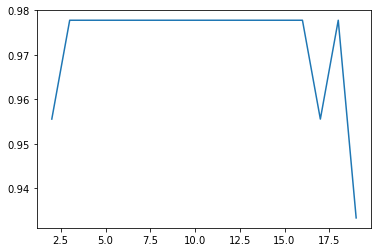

In [139]:
plt.plot(k_range,scores_list)

# Applying K MEANS Clustering

In [140]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

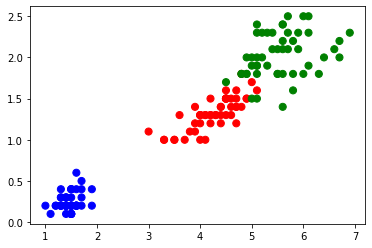

In [145]:
colormap=np.array(['blue','red','green'])
fig=plt.scatter(Iris['petal_length'],Iris['petal_width'],c=colormap[Y],s=50)

In [146]:
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [147]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [148]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=2,n_jobs=4)
km.fit(X)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



KMeans(n_clusters=3, n_jobs=4, random_state=2)

In [149]:
centers=km.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [150]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [151]:
Catagory_kmeans=['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']

In [152]:
Catagory_kmeans

['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']

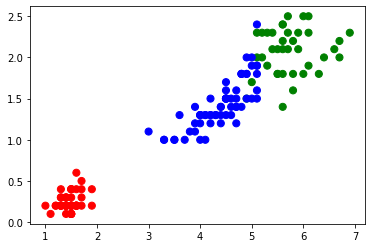

In [153]:
colormap=np.array(['blue','Red','green'])
fig=plt.scatter(Iris['petal_length'],Iris['petal_width'],c=colormap[km.labels_],s=50)

Text(0.5, 1.0, 'Predicted')

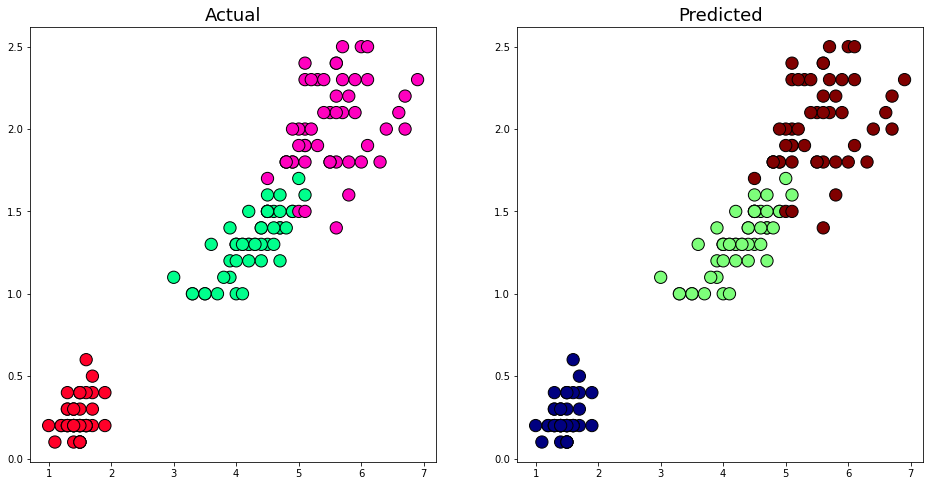

In [155]:
new_labels=km.labels_
fig,axes=plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(X[:,2],X[:,3],c=Y,cmap='gist_rainbow',edgecolor='k',s=150)
axes[1].scatter(X[:,2],X[:,3],c=Y,cmap='jet',edgecolor='k',s=150)
axes[0].set_title('Actual',fontsize=18)
axes[1].set_title('Predicted',fontsize=18)

#input value and predict 

In [166]:

X_km=np.array([[2 ,2, 2, 2]])

In [167]:
X_km_prediction=km.predict(X_km)
X_km_prediction[0]
print(Catagory_kmeans[int(X_km_prediction[0])])

Iris-Setosa


In [160]:
X_km=np.array([[3 ,3, 3, 3]])

In [161]:
X_km_prediction=km.predict(X_km)
X_km_prediction[0]
print(Catagory_kmeans[int(X_km_prediction[0])])

Iris-Versicolor
